<a href="https://colab.research.google.com/github/Mdhasim-tech/Machine-learning/blob/main/Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
df=pd.read_csv('Energy_Efficiency.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [10]:
# X1 Relative Compactness
# X2 Surface Area
# X3 Wall Area
# X4 Roof Area
# X5 Overall Height
# X6 Orientation
# X7 Glazing Area
# X8 Glazing Area Distribution
# y1 Heating Load
# y2 Cooling Load

df.rename(columns={'X1':'Compactness'},inplace=True)
df.rename(columns={'X2':'Surface_Area'},inplace=True)
df.rename(columns={'X3':'Wall_Area'},inplace=True)
df.rename(columns={'X4':'Roof_Area'},inplace=True)
df.rename(columns={'X5':'Overall_Height'},inplace=True)
df.rename(columns={'X6':'Orientation'},inplace=True)
df.rename(columns={'X7':'Glazing_Area'},inplace=True)
df.rename(columns={'X8':'Glazing_Area_Distribution'},inplace=True)
df.rename(columns={'Y1':'Heating_Load'},inplace=True)
df.rename(columns={'Y2':'Cooling_Load'},inplace=True)
df.head()


,Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [38]:
from re import X
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X=df.drop(['Heating_Load','Cooling_Load'],axis=1)
y=df[['Heating_Load','Cooling_Load']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
model=DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':[2,3,4,5,6,7,8,9,10],
    'criterion':['squared_error','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_features':['sqrt','log2']
}
grid_search=GridSearchCV(model,param_grid,cv=5,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [40]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'log2', 'splitter': 'best'}
-1.5210898637094423


In [41]:
# lets make the prediction
y_pred=grid_search.predict(X_test)
print(y_pred)




[[15.09       17.2       ]
 [13.01       15.71      ]
 [32.67428571 33.13      ]
 [41.3925     44.2925    ]
 [16.821      20.297     ]
 [23.33       28.0525    ]
 [24.24153846 25.95230769]
 [28.54       29.85727273]
 [19.2        21.72      ]
 [28.88       32.54      ]
 [19.12       21.93      ]
 [32.52       33.85      ]
 [28.65666667 32.29333333]
 [10.26       13.3925    ]
 [18.175      20.46      ]
 [36.955      37.025     ]
 [35.69       36.93      ]
 [11.985      14.57      ]
 [14.43846154 16.65615385]
 [33.245      34.23      ]
 [29.085      31.025     ]
 [41.45       46.015     ]
 [11.3525     14.56      ]
 [35.78       43.12      ]
 [15.25       19.28666667]
 [36.48333333 36.67333333]
 [35.985      36.53166667]
 [28.01       32.92      ]
 [17.14       20.47      ]
 [14.55666667 15.29666667]
 [10.3925     13.62      ]
 [12.05       14.788     ]
 [16.821      20.297     ]
 [25.74       28.27      ]
 [36.03       42.86      ]
 [28.54       29.85727273]
 [32.45888889 33.69666667]
 

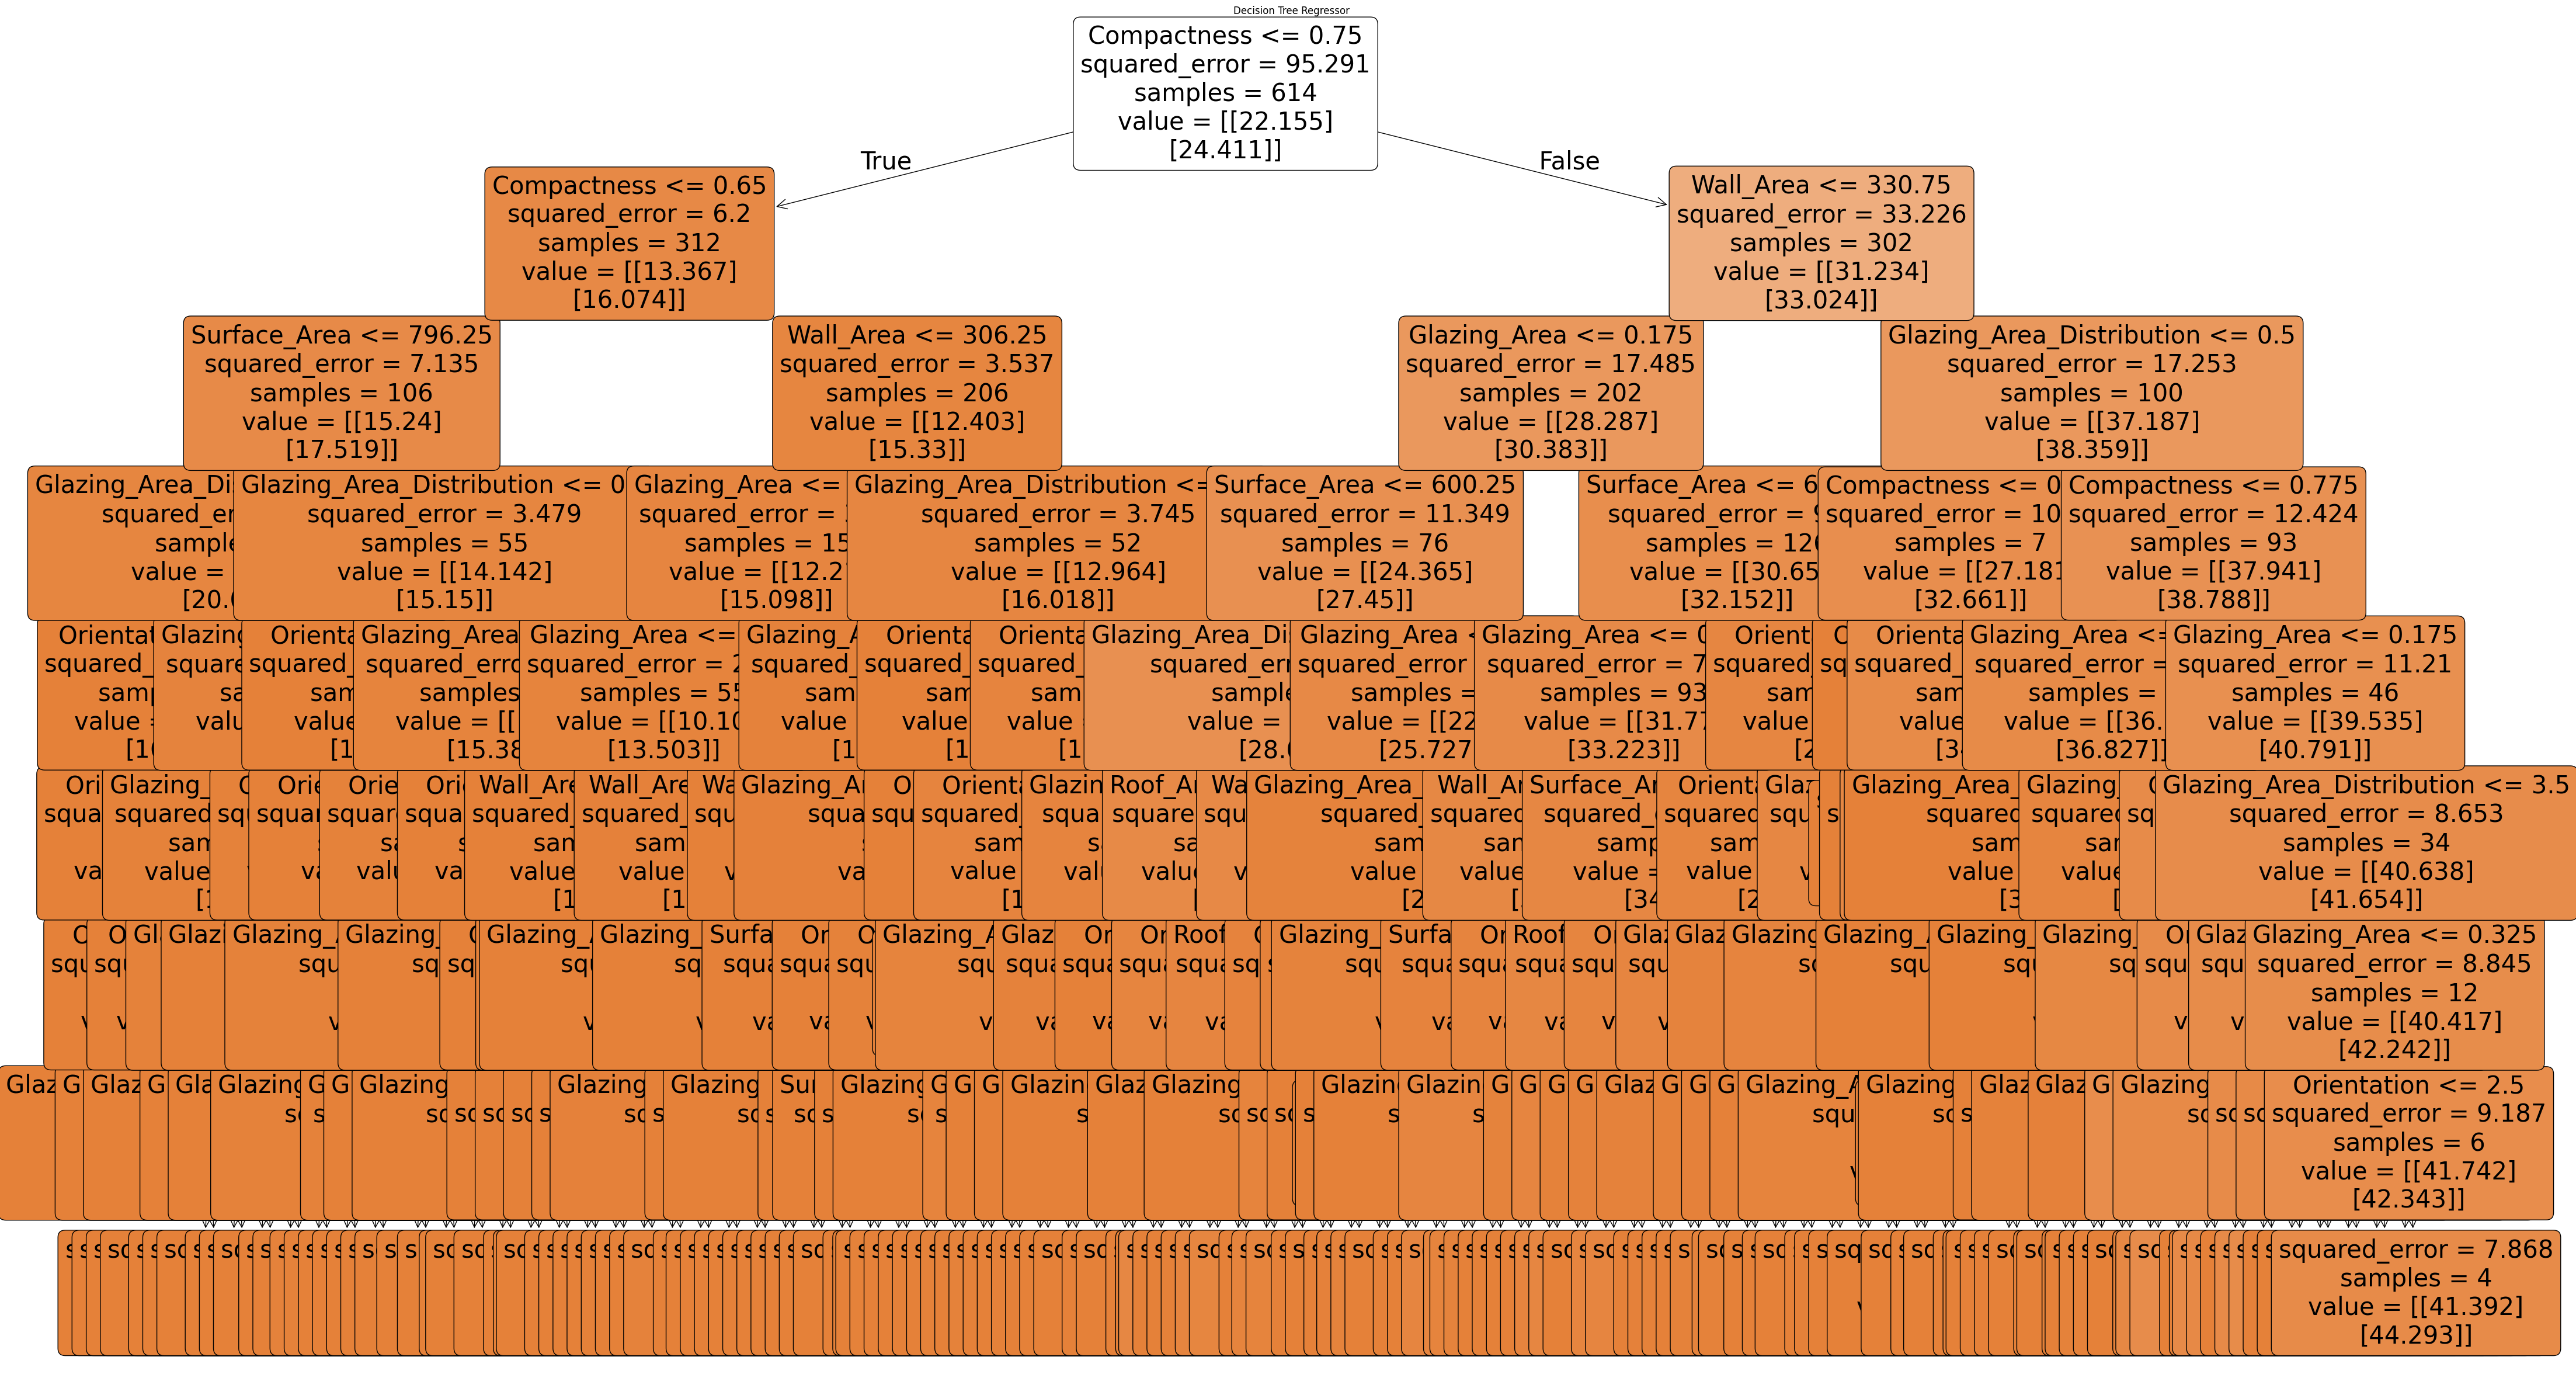

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract best model from GridSearchCV
best_model = grid_search.best_estimator_
plt.figure(figsize=(50, 30))  # Adjust size as needed
plot_tree(
    best_model,                     # your trained DecisionTreeRegressor
    feature_names=X.columns,  # pass feature names if using a DataFrame
    filled=True,              # color nodes based on output values
    rounded=True,             # rounded node boxes
    fontsize=30               # font size for readability
)
plt.title("Decision Tree Regressor")
plt.show()


In [43]:
print(r2_score(y_test,y_pred))#r2 score is close to 1 which is great
print(mean_squared_error(y_test,y_pred))#mse is also very less on average value--that means a good model

0.9752993558910525
2.3110218445462998


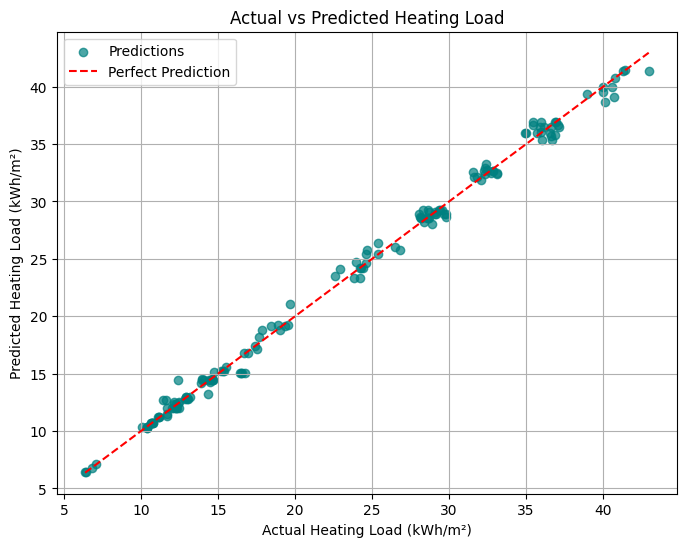

In [47]:
y_pred = best_model.predict(X_test)
# print(y_pred)
y_pred_heating = y_pred[:, 0]
y_pred_cooling = y_pred[:, 1]

y_test_heating = y_test.iloc[:, 0]
y_test_cooling = y_test.iloc[:, 1]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_heating, y_pred_heating, color='teal', alpha=0.7, label="Predictions")
plt.plot([y_test_heating.min(), y_test_heating.max()],
         [y_test_heating.min(), y_test_heating.max()],
         color='red', linestyle='--', label="Perfect Prediction")

plt.xlabel("Actual Heating Load (kWh/m²)")
plt.ylabel("Predicted Heating Load (kWh/m²)")
plt.title("Actual vs Predicted Heating Load")
plt.legend()
plt.grid(True)
plt.show()


# # Lets save the model
# import joblib
# joblib.dump(best_model,'Heating_Cooling_Load_Model.pkl')

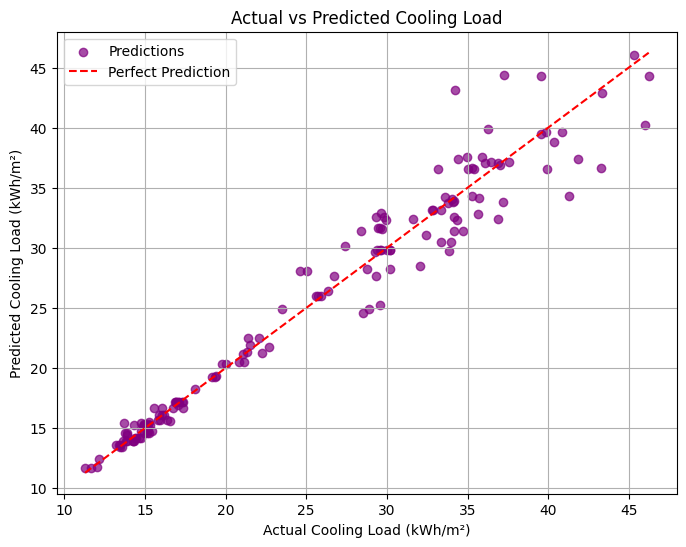

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cooling, y_pred_cooling, color='purple', alpha=0.7, label="Predictions")
plt.plot([y_test_cooling.min(), y_test_cooling.max()],
         [y_test_cooling.min(), y_test_cooling.max()],
         color='red', linestyle='--', label="Perfect Prediction")

plt.xlabel("Actual Cooling Load (kWh/m²)")
plt.ylabel("Predicted Cooling Load (kWh/m²)")
plt.title("Actual vs Predicted Cooling Load")
plt.legend()
plt.grid(True)
plt.show()
